[![Binder](https://mybinder.org/badge_logo.svg)](https://nbviewer.org/github/Sistemas-Multimedia/Sistemas-Multimedia.github.io/blob/master/contents/gray_SQ/compare_quantizers.ipynb)

[![Colab](https://badgen.net/badge/Launch/on%20Google%20Colab/blue?icon=notebook)](https://colab.research.google.com/github/Sistemas-Multimedia/Sistemas-Multimedia.github.io/blob/master/contents/gray_SQ/compare_quantizers.ipynb)

# Quantizers comparison in the Gray-scale domain

In [2]:
%%bash
if [ -d "$HOME/repos" ]; then
    echo "\"$HOME/repos\" exists"
else
    mkdir ~/repos
    echo Created $HOME/repos
fi

"/home/vruiz/repos" exists


In [3]:
%%bash
if [ -d "$HOME/repos/scalar_quantization" ]; then
    cd $HOME/repos/scalar_quantization
    echo "$HOME/repos/scalar_quantization ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/vicente-gonzalez-ruiz/scalar_quantization.git
fi

/home/vruiz/repos/scalar_quantization ... 
Ya está actualizado.


In [4]:
%%bash
if [ -d "$HOME/repos/MRVC" ]; then
    cd $HOME/repos/MRVC
    echo "$HOME/repos/MRVC ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/Sistemas-Multimedia/MRVC.git
fi

/home/vruiz/repos/MRVC ... 
Ya está actualizado.


In [5]:
if 'google.colab' in str(get_ipython()):
    !wget https://raw.githubusercontent.com/Sistemas-Multimedia/Sistemas-Multimedia.github.io/master/contents/scalar_quantization/midtread.ipynb
    !wget https://raw.githubusercontent.com/Sistemas-Multimedia/Sistemas-Multimedia.github.io/master/contents/scalar_quantization/midrise.ipynb
    !wget https://raw.githubusercontent.com/Sistemas-Multimedia/Sistemas-Multimedia.github.io/master/contents/scalar_quantization/deadzone.ipynb
    !wget https://raw.githubusercontent.com/Sistemas-Multimedia/Sistemas-Multimedia.github.io/master/contents/scalar_quantization/companded.ipynb
    !wget https://raw.githubusercontent.com/Sistemas-Multimedia/Sistemas-Multimedia.github.io/master/contents/scalar_quantization/LloydMax.ipynb

In [6]:
#!ln -sf ~/MRVC/src/debug.py .
#!ln -sf ~/MRVC/src/logging_config.py .
#!ln -sf ~/repos/scalar_quantization/distortion.py .
#!ln -sf ~/repos/image_IO/image_3.py .
#!ln -sf ~/repos/image_IO/image_1.py .
#!ln -sf ~/repos/scalar_quantization/information.py .
#!ln -sf ~/repos/image_IO/logging_config.py .

In [7]:
try:
    import matplotlib.pyplot as plt
except:
    !pip install matplotlib
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.axes as ax
    #plt.rcParams['text.usetex'] = True
    #plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
%matplotlib inline

import pylab
import os

In [8]:
def load(path):
    curve = []
    with open(path, 'r') as f:
        for line in f:
            rate, _distortion = line.split('\t')
            curve.append((float(rate), float(_distortion)))
    return curve

In [9]:
if not os.path.exists("mid-rise_RD_points.txt"):
    %run ./midrise.ipynb
midrise_RD = load("mid-rise_RD_points.txt")

In [10]:
if not os.path.exists("dead-zone_RD_points.txt"):
    %run ./deadzone.ipynb
deadzone_RD = load("dead-zone_RD_points.txt")

In [11]:
if not os.path.exists("mid-tread_RD_points.txt"):
    %run ./midtread.ipynb
midtread_RD = load("mid-tread_RD_points.txt")

In [12]:
if not os.path.exists("companded_RD_points.txt"):
    %run ./companded.ipynb
companded_RD = load("companded_RD_points.txt")

In [13]:
if not os.path.exists("LloydMax_RD_points.txt"):
    %run ./LloydMax.ipynb
Lloyd_Max_RD = load("LloydMax_RD_points.txt")

In [14]:
#VQ = []
#with open(f"VQ_RD_points.txt", 'r') as f:
#    for line in f:
#        rate, _distortion = line.split('\t')
#        VQ.append((float(rate), float(_distortion)))

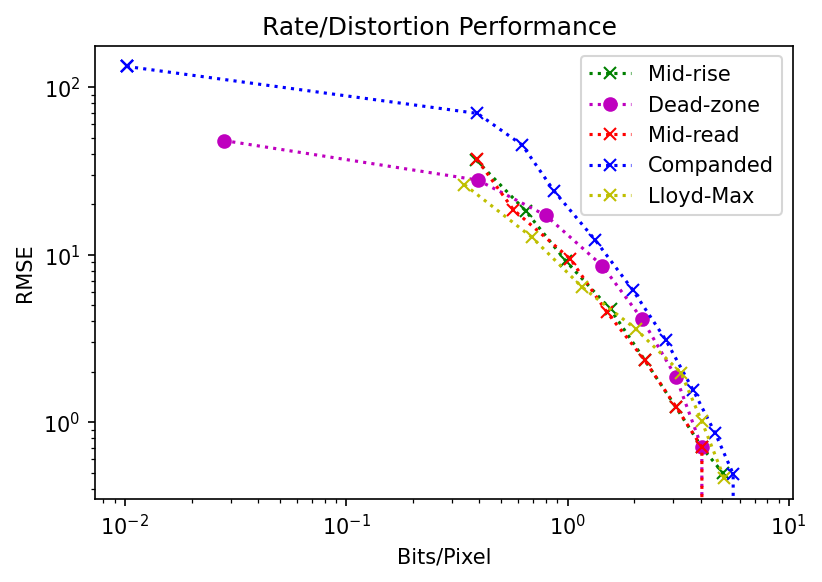

In [15]:
pylab.figure(dpi=150)
pylab.plot(*zip(*midrise_RD), c='g', marker='x', label="Mid-rise", linestyle="dotted")
pylab.plot(*zip(*deadzone_RD), c='m', marker='o', label="Dead-zone", linestyle="dotted")
pylab.plot(*zip(*midtread_RD), c='r', marker='x', label="Mid-read", linestyle="dotted")
pylab.plot(*zip(*companded_RD), c='b', marker='x', label="Companded", linestyle="dotted")
pylab.plot(*zip(*Lloyd_Max_RD), c='y', marker='x', label="Lloyd-Max", linestyle="dotted")
#pylab.plot(*zip(*VQ), c='k', marker='x', label="VQ", linestyle="dotted")
pylab.title("Rate/Distortion Performance ")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("RMSE")
pylab.legend(loc='upper right')
pylab.xscale("log")
pylab.yscale("log")
pylab.show()